In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym
import urllib

In [2]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'
data = urllib.request.urlopen(url)

In [3]:
Data = pd.read_csv(data,sep=',')
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [15]:
Diff = np.zeros((len(X),len(Y)))
Diff[:,0] = Y

for i in range(1,len(X)):
    for j in range(i,len(Y)):
        Diff[j,i] = Diff[j,i-1]-Diff[j-1,i-1]

In [28]:
def NewtonGregory(X,Y,x):
    
    Sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(Y)))
    Diff[:,0] = Y

            
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= ( x - X[i-1] )
        
        for j in range(i, len(X)):
            h = X[j] - X[j-i]
            Diff[j,i] = (Diff[j,i-1]-Diff[j-1,i-1])/h      
        Sum_ += poly*(Diff[i,i])
    
    return Sum_

In [34]:
x = np.linspace(np.min(X),np.max(X),100)
y = NewtonGregory(X,Y,x)

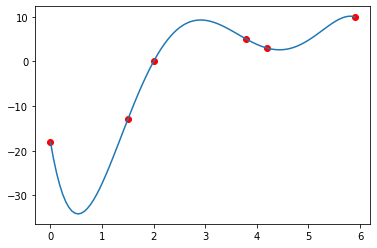

In [35]:
plt.plot(x,y)
plt.scatter(X,Y,color='r')

In [37]:
x = sym.Symbol('x')
y = NewtonGregory(X,Y,x)
y=y.expand()
print('El polinomio interpolante de menor grado es: ')
print(y)

El polinomio interpolante de menor grado es: 
-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0
